# Example: State Space Models of the Excess Return Distribution
Fill me in

## Setup
We set up the computational environment by including the `Include.jl` file. The `Include.jl` file loads external packages, various functions we will use in the exercise, and custom types to model the components of our example problem.

In [3]:
include("Include.jl");

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
    Updating `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-2/Project.toml`
  [4119e0bf] ~ VLQuantitativeFinancePackage v1.0.0-DEV `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git#main` ⇒ v1.0.0-DEV `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git#main`
    Updating `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-2/Manifest.toml`
  [4119e0bf] ~ VLQuantitativeFinancePackage v1.0.0-DEV `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git#main` ⇒ v1.0.0-DEV `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git#main`
Precompiling project...
  ✓ VLQuantitativeFinancePackage
  1 dependency successfully precompiled in 3 seconds. 283 already precompiled.
  Activating project at `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-2`
 

## Prerequisites: Load and clean the historical dataset
We gathered a daily open-high-low-close `dataset` for each firm in the [S&P500](https://en.wikipedia.org/wiki/S%26P_500) from `01-03-2018` until `12-29-2023`, along with data for a few exchange-traded funds and volatility products during that time. 
* We load the `orignal_dataset` by calling the `MyMarketDataSet()` function and remove firms that do not have the maximum number of trading days. The cleaned dataset $\mathcal{D}$ is stored in the `dataset` variable. The dataset $\mathcal{D}$ has data for $\mathcal{L}$ firms, held in the `list_of_all_firms` variable.

In [5]:
original_dataset = MyMarketDataSet() |> x-> x["dataset"];

### Clean the data
Not all tickers in our dataset have the maximum number of trading days for various reasons, e.g., acquisition or de-listing events. Let's collect only those tickers with the maximum number of trading days.

* First, let's compute the number of records for a company that we know has a maximum value, e.g., `AAPL`, and save that value in the `maximum_number_trading_days` variable:

In [7]:
maximum_number_trading_days = original_dataset["AAPL"] |> nrow;

Now, let's iterate through our data and collect only tickers with `maximum_number_trading_days` records. Save that data in the `dataset::Dict{String,DataFrame}` variable:

In [9]:
dataset = Dict{String,DataFrame}();
for (ticker,data) ∈ original_dataset
    if (nrow(data) == maximum_number_trading_days)
        dataset[ticker] = data;
    end
end
dataset;

Then, get a list of firms that we have in the cleaned-up `dataset` and save it in the `list_of_all_firms` array (we sort these alphabetically):

In [11]:
list_of_all_firms = keys(dataset) |> collect |> sort;

Finally, we set some constant values that are used throughout the study. In particular, the value of $\Delta{t}$ holds the time step that we'll use (see below for a discussion of the value), and we'll specify the number of trading days to simulate in the `T` variable:

In [13]:
Δt = (1.0/252.0);
all_range = range(1,stop=maximum_number_trading_days,step=1) |> collect;
risk_free_rate = 0.045;

## Build the HiPPO-LegS model instance
Fill me in.

Fill me in

In [16]:
all_firms_growth_matrix = log_return_matrix(dataset, list_of_all_firms, Δt = (1.0/252.0), 
    risk_free_rate = risk_free_rate);

In [17]:
ticker_of_interest = "AMD";

In [18]:
excess_growth_rate_array = findfirst(x->x==ticker_of_interest,list_of_all_firms) |> i -> all_firms_growth_matrix[:,i];

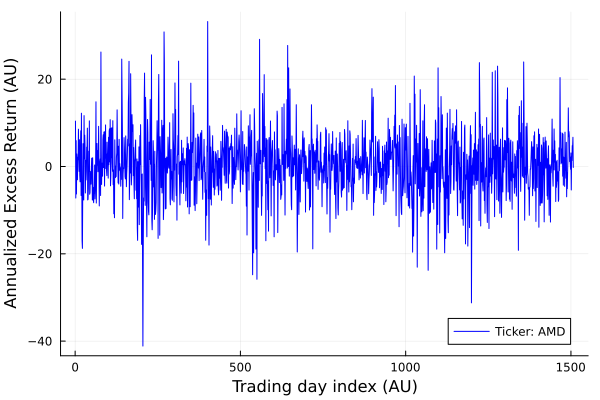

In [19]:
plot(excess_growth_rate_array, label="Ticker: $(ticker_of_interest)", c=:blue)
xlabel!("Trading day index (AU)", fontsize=18)
ylabel!("Annualized Excess Return (AU)", fontsize=18)

In [20]:
tspan = (start = 0.0, stop = 3, step = 1/252)
L = range(tspan.start, stop=tspan.stop, step = tspan.step) |> collect |> length
signal = excess_growth_rate_array[1:L];

In [21]:
number_of_hidden_states = 50;
model = build(MySisoLegSHippoModel, (
    number_of_hidden_states = number_of_hidden_states,
    Δt = Δt,
    uₒ = signal[1],
    C = 10*randn(number_of_hidden_states)
));

In [22]:
(T1,X1,Y1) = solve(model, tspan, signal);

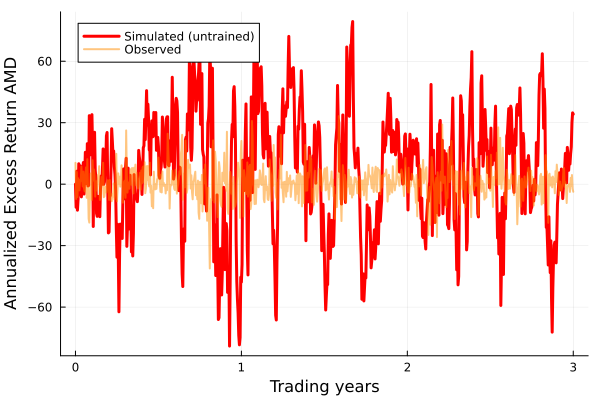

In [23]:
plot(T1,Y1,label="Simulated (untrained)", lw=3, c=:red)
plot!(T1,signal, label="Observed", lw=2, c=:darkorange, alpha=0.5)
xlabel!("Trading years", fontsize=18)
ylabel!("Annualized Excess Return $(ticker_of_interest)", fontsize=18)

In [24]:
C = estimate_hippo_parameters(model, tspan, signal);

In [25]:
model_updated = deepcopy(model);
model_updated.Ĉ = C;
(T2,X2,Y2) = solve(model_updated, tspan, signal);

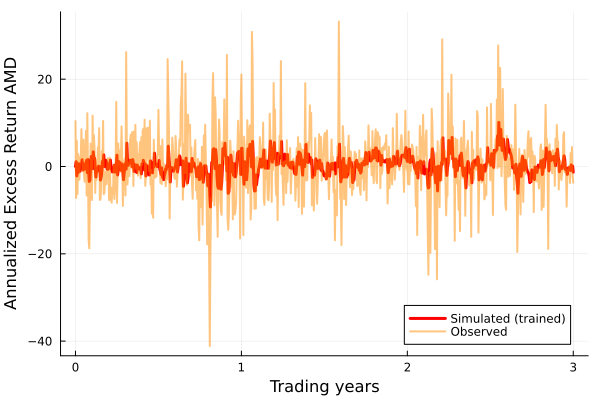

In [26]:
plot(T2,Y2,label="Simulated (trained)", lw=3, c=:red)
plot!(T2,signal, label="Observed", lw=2, c=:darkorange, alpha=0.5)
xlabel!("Trading years", fontsize=18)
ylabel!("Annualized Excess Return $(ticker_of_interest)", fontsize=18)

## Return Distributions
Fill me in

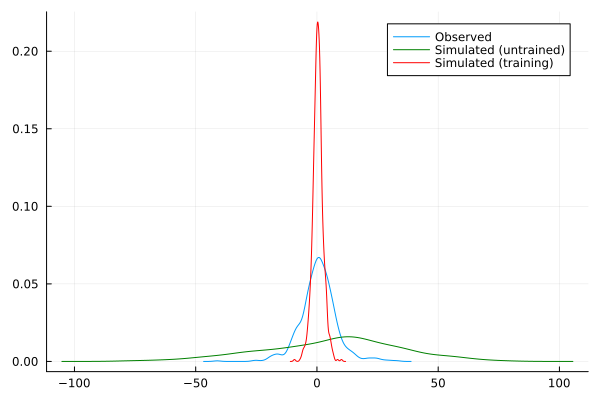

In [28]:
density(signal, label="Observed")
density!(Y1, normalize=true, c=:green, label="Simulated (untrained)")
density!(Y2, normalize=true, c=:red, label="Simulated (training)")

## Disclaimer and Risks
__This content is offered solely for training and informational purposes__. No offer or solicitation to buy or sell securities or derivative products or any investment or trading advice or strategy is made, given, or endorsed by the teaching team. 

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance.  Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. Such decisions should be based solely on evaluating your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.